In [1]:
import numpy as np
import pandas as pd

from datetime import date
import time

import random
from random import seed
from random import random

import os, os.path
import shutil

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

import matplotlib
import matplotlib.pyplot as plt
from pylab import imshow
import pickle
import h5py
import sys
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
import netCDF4 as netcd
from netCDF4 import Dataset
import cfgrib as grib
import xarray as xr

**You should install the packages like so:**

```conda install -c conda-forge netCDF4```

```conda install -c conda-forge cfgrib```

## Directories

In [3]:
database = "/mnt/waterchallenge"
NOAA_Ice_SST_dir = database + "NOAA_Ice_SST/"
ERA5_monthly_gridded_dir = database + "ERA5_monthly_gridded/"

In [4]:
NOAA_Ice_SST_dir_files = sorted(os.listdir(NOAA_Ice_SST_dir))
ERA5_monthly_gridded_dir_files = sorted(os.listdir(ERA5_monthly_gridded_dir))

#### Clean non-data files

In [5]:
# print (NOAA_Ice_SST_dir_files)
print ()
print ('Number of files in NOAA_Ice_SST_dir is [{SR}].'.format(SR=len(NOAA_Ice_SST_dir_files)))
print ("=========================================================================================================")
NOAA_files = []
for file in NOAA_Ice_SST_dir_files:
    if (file.endswith(".nc")):
        NOAA_files += [file]
print ('Number of files in NOAA_Ice_SST_dir is [{SR}].'.format(SR=len(NOAA_Ice_SST_dir_files)))

NOAA_files


Number of files in NOAA_Ice_SST_dir is [5].
Number of files in NOAA_Ice_SST_dir is [5].


['icec.mnmean.nc',
 'icec.wkmean.1990-present.nc',
 'sst.mnmean.nc',
 'sst.wkmean.1990-present.nc']

In [6]:
# print (ERA5_monthly_gridded_dir_files)
print ('Number of files in ERA5_monthly_gridded_dir is [{SR}].'.format(SR=len(ERA5_monthly_gridded_dir_files)))
ERA5_files = []
print ("=========================================================================================================")
for file in ERA5_monthly_gridded_dir_files:
    if (file.endswith(".grib")):
        ERA5_files += [file]
        
print ('Number of files in ERA5_monthly_gridded_dir is [{SR}].'.format(SR=len(ERA5_files)))

Number of files in ERA5_monthly_gridded_dir is [9].
Number of files in ERA5_monthly_gridded_dir is [4].


In [7]:
ERA5_files

['adaptor.mars.internal_SST_SOilVWC_2022_Jan_Sep.grib',
 'adaptor.mars.internal_SST_SoilVWC_1980_2021_Jan_Dec.grib',
 'adaptor.mars.internal_SeaIceCover_1980_2021_Jan_Dec.grib',
 'adaptor.mars.internal_SeaIceCover_2022_Jan_Sep.grib']

# ERA5_monthly_gridded

The data here are in the form of ```.grib```. Available variables are
```['sst','swvl1','swvl2','swvl3','swvl4','siconc']```.

In [8]:
# We got these earlier:
print ("\033[1m" + "The ERA5_monthly_gridded directory is" + "\033[0m" + "\n")
print (ERA5_monthly_gridded_dir)
print ("================================================================================================")
print ()
print ("\033[1m" + "The files in the directory ERA5_monthly_gridded are:" + "\033[0m"+"\n")
print (ERA5_files)

The ERA5_monthly_gridded directory is

/Users/hn/Documents/01_research_data/Hackathon_2023/ERA5_monthly_gridded/

The files in the directory ERA5_monthly_gridded are:

['adaptor.mars.internal_SST_SOilVWC_2022_Jan_Sep.grib', 'adaptor.mars.internal_SST_SoilVWC_1980_2021_Jan_Dec.grib', 'adaptor.mars.internal_SeaIceCover_1980_2021_Jan_Dec.grib', 'adaptor.mars.internal_SeaIceCover_2022_Jan_Sep.grib']


In [10]:
gribfile = "adaptor.mars.internal_SST_SoilVWC_1980_2021_Jan_Dec.grib"
var = "sst"
ds = xr.open_dataset(ERA5_monthly_gridded_dir + "/" + gribfile, 
                     engine="cfgrib", 
                     backend_kwargs={"filter_by_keys": {"shortName": var}})
ds

<xarray.Dataset>
Dimensions:     (time: 504, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2021-12-01
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  (time) datetime64[ns] ...
Data variables:
    sst         (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-01-26T10:56 GRIB to CDM+CF via cfgrib-0.9.1...

In [11]:
long_line = "\033[1m" + "_______________________________________________________" + "\033[0m"
print ("\033[1m" + "Access the data inside:" + "\033[0m" +"\n"+long_line)

print ("type(ds) is {}".format(type(ds)))
print (long_line)

print ("ds.data_vars:\n{}".format(ds.data_vars))
print (long_line)

print ("ds.coords:\n{}".format(ds.coords))
print (long_line)


print ("ds.coords:\n{}".format(ds.coords))
print (long_line)

print ("ds.attrs:\n{}".format(ds.attrs))
print (long_line)

Access the data inside:
_______________________________________________________
type(ds) is <class 'xarray.core.dataset.Dataset'>
_______________________________________________________
ds.data_vars:
Data variables:
    sst      (time, latitude, longitude) float32 ...
_______________________________________________________
ds.coords:
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2021-12-01
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2021-12-01
_______________________________________________________
ds.coords:
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2021-12-01
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
  * 

In [12]:
ds.coords

Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2021-12-01
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2021-12-01

In [13]:
%%time
ds_dataframe = ds.to_dataframe()
del(ds)
ds_dataframe

CPU times: user 22.2 s, sys: 14.9 s, total: 37.1 s
Wall time: 51.1 s


number   step  surface valid_time         sst
time       latitude longitude                                               
1980-01-01  90.0    0.00            0 0 days      0.0 1980-01-01  271.459961
                    0.25            0 0 days      0.0 1980-01-01  271.459961
                    0.50            0 0 days      0.0 1980-01-01  271.459961
                    0.75            0 0 days      0.0 1980-01-01  271.459961
                    1.00            0 0 days      0.0 1980-01-01  271.459961
...                               ...    ...      ...        ...         ...
2021-12-01 -90.0    358.75          0 0 days      0.0 2021-12-01         NaN
                    359.00          0 0 days      0.0 2021-12-01         NaN
                    359.25          0 0 days      0.0 2021-12-01         NaN
                    359.50          0 0 days      0.0 2021-12-01         NaN
                    359.75          0 0 days      0.0 2021-12-01         NaN

[523272960 rows x 5 columns]

In [14]:
print ("ds_dataframe.number.min() is {}.".format(ds_dataframe.number.min()))
print ("ds_dataframe.number.max() is {}.".format(ds_dataframe.number.max()))
print (long_line)

print ("ds_dataframe.step.min() is {}.".format(ds_dataframe.step.min()))
print ("ds_dataframe.step.max() is {}.".format(ds_dataframe.step.max()))
print (long_line)

print ("ds_dataframe.surface.min() is {}.".format(ds_dataframe.surface.min()))
print ("ds_dataframe.surface.max() is {}.".format(ds_dataframe.surface.max()))

ds_dataframe.number.min() is 0.
ds_dataframe.number.max() is 0.
_______________________________________________________
ds_dataframe.step.min() is 0 days 00:00:00.
ds_dataframe.step.max() is 0 days 00:00:00.
_______________________________________________________
ds_dataframe.surface.min() is 0.0.
ds_dataframe.surface.max() is 0.0.


In [15]:
print (type(ds_dataframe))
print (ds_dataframe.shape)

<class 'pandas.core.frame.DataFrame'>
(523272960, 5)


## ```siconc``` is in a different file.

In [16]:
gribfile = "adaptor.mars.internal_SeaIceCover_1980_2021_Jan_Dec.grib"
var = "siconc"
gribfile = "adaptor.mars.internal_SeaIceCover_1980_2021_Jan_Dec.grib"
SeaIceCover1980 = xr.open_dataset(ERA5_monthly_gridded_dir + "/" + gribfile, engine="cfgrib")
    
    
# SeaIceCover1980 = xr.open_dataset(ERA5_monthly_gridded_dir + "/" + gribfile, 
#                                   engine="cfgrib", 
#                                   backend_kwargs={'filter_by_keys': {'shortName': var}})

print ("SeaIceCover1980.keys() are {}.".format(SeaIceCover1980.keys()))
print (long_line)
SeaIceCover1980

SeaIceCover1980.keys() are KeysView(<xarray.Dataset>
Dimensions:     (time: 504, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2021-12-01
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  (time) datetime64[ns] ...
Data variables:
    siconc      (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-01-26T10:57 GRIB to CDM+CF via cfgrib-0.9.1...).
____________________________________________________

<xarray.Dataset>
Dimensions:     (time: 504, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2021-12-01
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  (time) datetime64[ns] ...
Data variables:
    siconc      (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-01-26T10:57 GRIB to CDM+CF via cfgrib-0.9.1...

In [17]:
%%time
SeaIceCover1980_DF = SeaIceCover1980.to_dataframe()
del(SeaIceCover1980)

print ("SeaIceCover1980_DF.number.min() is {}.".format(SeaIceCover1980_DF.number.min()))
print ("SeaIceCover1980_DF.number.max() is {}.".format(SeaIceCover1980_DF.number.max()))
print (long_line)

print ("SeaIceCover1980_DF.step.min() is {}.".format(SeaIceCover1980_DF.step.min()))
print ("SeaIceCover1980_DF.step.max() is {}.".format(SeaIceCover1980_DF.step.max()))
print (long_line)

print ("SeaIceCover1980_DF.surface.min() is {}.".format(SeaIceCover1980_DF.surface.min()))
print ("SeaIceCover1980_DF.surface.max() is {}.".format(SeaIceCover1980_DF.surface.max()))

SeaIceCover1980_DF

SeaIceCover1980_DF.number.min() is 0.
SeaIceCover1980_DF.number.max() is 0.
_______________________________________________________
SeaIceCover1980_DF.step.min() is 0 days 00:00:00.
SeaIceCover1980_DF.step.max() is 0 days 00:00:00.
_______________________________________________________
SeaIceCover1980_DF.surface.min() is 0.0.
SeaIceCover1980_DF.surface.max() is 0.0.
CPU times: user 28.8 s, sys: 24.8 s, total: 53.6 s
Wall time: 57 s


number   step  surface valid_time    siconc
time       latitude longitude                                             
1980-01-01  90.0    0.00            0 0 days      0.0 1980-01-01  0.959045
                    0.25            0 0 days      0.0 1980-01-01  0.959045
                    0.50            0 0 days      0.0 1980-01-01  0.959045
                    0.75            0 0 days      0.0 1980-01-01  0.959045
                    1.00            0 0 days      0.0 1980-01-01  0.959045
...                               ...    ...      ...        ...       ...
2021-12-01 -90.0    358.75          0 0 days      0.0 2021-12-01       NaN
                    359.00          0 0 days      0.0 2021-12-01       NaN
                    359.25          0 0 days      0.0 2021-12-01       NaN
                    359.50          0 0 days      0.0 2021-12-01       NaN
                    359.75          0 0 days      0.0 2021-12-01       NaN

[523272960 rows x 5 columns]

## NOAA_Ice_SST_dir

In [18]:
NOAA_Ice_SST_dir_files = sorted(os.listdir(NOAA_Ice_SST_dir))
NOAA_Ice_SST_dir_files = [a_file for a_file in NOAA_Ice_SST_dir_files if a_file.endswith(".nc")]
NOAA_Ice_SST_dir_files

['icec.mnmean.nc',
 'icec.wkmean.1990-present.nc',
 'sst.mnmean.nc',
 'sst.wkmean.1990-present.nc']

In [19]:
NOAA_vars = ['sst','icec']
sst_file_name = "sst.mnmean.nc"
icec_file_name = "icec.mnmean.nc"

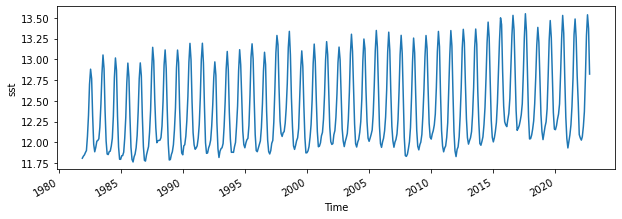

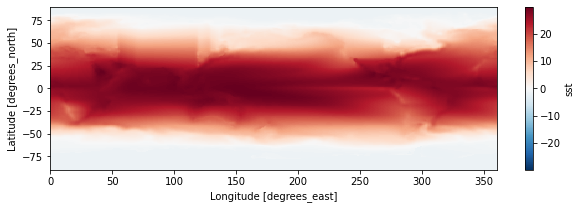

In [20]:
# read netcdf file into xarray
sst_NOAA  = xr.open_dataset(NOAA_Ice_SST_dir + sst_file_name)
icec_NOAA = xr.open_dataset(NOAA_Ice_SST_dir + icec_file_name)
#
# plot time series
#
matplotlib.rc('figure', figsize=(10, 3))

time_series_mean = sst_NOAA["sst"].mean(dim=['lat','lon'])
figindex = 0
plt.figure(figindex);
time_series_mean.plot();
#
# plot multiple year mean
#
figindex += 1
spatial_mean = sst_NOAA["sst"].mean(dim=['time']);
plt.figure(figindex);
spatial_mean.plot();

del spatial_mean, time_series_mean

In [21]:
%%time
icec_NOAA_df = icec_NOAA.to_dataframe()
icec_NOAA_df

CPU times: user 1.83 s, sys: 899 ms, total: 2.73 s
Wall time: 3.68 s


icec  time_bnds
time       lat   lon   nbnds                  
1981-12-01  89.5 0.5   0      100.0 1981-12-01
                       1      100.0 1982-01-01
                 1.5   0      100.0 1981-12-01
                       1      100.0 1982-01-01
                 2.5   0      100.0 1981-12-01
...                             ...        ...
2022-10-01 -89.5 357.5 1        NaN 2022-11-01
                 358.5 0        NaN 2022-10-01
                       1        NaN 2022-11-01
                 359.5 0        NaN 2022-10-01
                       1        NaN 2022-11-01

[63633600 rows x 2 columns]